# 👨‍💻 Coding a neural net
Alright, finally we are here. Don't wanna talk about much let's keep coding straightly, have to explore a lot of stuff here. We will be trying the NN on the our old school *airline passengers* dataset.

Let's go!

In [ ]:
# usual imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams["figure.figsize"] = (8, 6)

# deep imports
import tensorflow as tf

# the evaluation
from sklearn.metrics import mean_absolute_percentage_error, r2_score
from tensorflow.keras.layers import Dense, Input  # to create layer
from tensorflow.keras.models import Model  # whole model

Damn, this time apart from metrics, there is no `sklearn` import at all!

In [ ]:
# we can put the seeds for tensorflow this way
tf.random.set_seed(42)

In [ ]:
passengers = pd.read_csv(
    "/content/airline_passengers.csv", parse_dates=True, index_col=0
)

In [ ]:
passengers.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


A bit of plotting as a refresher.

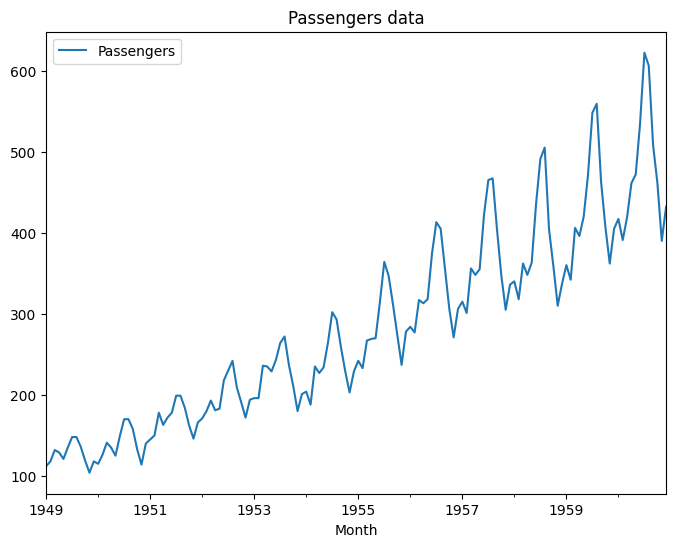

In [ ]:
passengers.plot()
plt.title("Passengers data");

Done. Let's start creating the models.

The outline of this notebook:
1. Create a **one-step** model
2. Create a **multi-step** / incremental model
3. Create a **multi-output** / MTR model

After that, we will *try* other stuff like:
- Training all of those (from steps 1, 2, 3) models *without* differencing.

#####

## Differenceing

In [ ]:
passengers["diffPassengers"] = passengers["Passengers"].diff()

In [ ]:
passengers.head()

,Passengers,diffPassengers
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0


## `1.` One step model

In [ ]:
lag = 12
train_idx = passengers.iloc[:-lag].index
test_idx = passengers.iloc[-lag:].index

In [ ]:
np_data = passengers.loc[:, "diffPassengers"].dropna().values
X = []
Y = []

for i in range(0, np_data.shape[0] - lag):
    x = np_data[i : i + lag]
    y = np_data[i + lag]
    X.append(x)
    Y.append(y)

X = np.array(X)
Y = np.array(Y)

In [ ]:
Xtr, Xte = X[:-lag], X[-lag:]
ytr, yte = Y[:-lag], Y[-lag:]

## Model creation

#### ➡ Input layer

In [ ]:
# set the input layer
input_layer = Input(shape=(Xtr.shape[1],))

There, we have initialized the input with `12` nodes. Which are the number of columns. They are coming based on the `lag` variable that we have set there.

In [ ]:
input_layer

<KerasTensor: shape=(None, 12) dtype=float32 (created by layer 'input_1')>

Now, we will go ahead and add the first *hidden layer* in the NN.

#### ➡ Hidden layer

In [ ]:
# first hidden layer
h1 = Dense(units=32, activation="relu")

There, we have just made `1st` **hidden** layer with 32 nodes inside with the activation "relu". If we would have passed nothing in the `activation` parameter, then it would **not** apply any activation at all!

The available activation functions are...

In [ ]:
from tensorflow.keras import activations

activations.relu

<function keras.src.activations.relu(x, alpha=0.0, max_value=None, threshold=0.0)>

#### ➡ Hidden layer connection with previous layer

In [ ]:
# we can use the "brackets" with the object to connect with the layer
h1(input_layer)

<KerasTensor: shape=(None, 32) dtype=float32 (created by layer 'dense')>

Don't be surprised, it is simply done with the `__call__` magic method in the `Dense` class! A python thing.

So, that can be re-written as...

In [ ]:
# connection in single step
h1 = Dense(32, activation="relu")(input_layer)

Simple!

#### ➡ Hidden layer (x2)

In [ ]:
h2 = Dense(16, activation="relu")(h1)

So, till now — we have created a NN with:
- 12 input nodes
- 32 1st layer nodes
- 16 2nd layer nodes

And now we will be making the final, output layer.

#### ➡ Output layer

In [ ]:
output_layer = Dense(1, activation=None)(h2)

That simple! Just **take care** of the **conections**. That what you are connecting with what.

#### ➡ Everything in a single pack = Model

In [ ]:
model = Model(input_layer, output_layer)

Which from their doc:

    `Model` groups layers into an object with training and inference features.

    Args:
        inputs: The input(s) of the model: a `keras.Input` object or list of
            `keras.Input` objects.
        outputs: The output(s) of the model. See Functional API example below.
        name: String, the name of the model.


In [ ]:
# everything in a single cell
input_layer = Input(shape=(Xtr.shape[1],))
h1 = Dense(32, activation="relu")(input_layer)
h2 = Dense(16, activation="relu")(h1)
output_layer = Dense(1, activation=None)(h2)
model = Model(input_layer, output_layer)

Our neural net is ready bois!

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 12)]              0         
                                                                 
 dense_4 (Dense)             (None, 32)                416       
                                                                 
 dense_5 (Dense)             (None, 16)                528       
                                                                 
 dense_6 (Dense)             (None, 1)                 17        
                                                                 
Total params: 961 (3.75 KB)
Trainable params: 961 (3.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### ➡ Compile the model

In [ ]:
model.compile(optimizer="adam", loss="mse", metrics=["mse", "mape"])

This will let the model know which way it should get trained. There are multiple methods. I know, it is abstract, but in the course it is unnecessary to go in those details. I am pretty sure, when I will be learning deep learning **"deeply"**, I will get to know them as well.

But, for now — keep that in mind that there are multiple optimizers available for our model to get trained.

In [ ]:
from tensorflow.keras import optimizers
optimizers.Adam

keras.src.optimizers.adam.Adam

In [ ]:
from tensorflow.keras import losses
losses.mse

<function keras.src.losses.mean_squared_error(y_true, y_pred)>

Yeah, there are a lot of them.

In [ ]:
from tensorflow.keras import metrics
metrics.Accuracy

keras.src.metrics.accuracy_metrics.Accuracy

Ah, writing a lot lately... but still worth exploring that these are the options available!

In [ ]:
result = model.fit(Xtr, ytr,
         epochs=100,
         validation_data=(Xte, yte), verbose=1)

Epoch 1/100
4/4 [==============================] - 1s 91ms/step - loss: 1080.7047 - mse: 1080.7047 - mape: 197267280.0000 - val_loss: 1939.0890 - val_mse: 1939.0890 - val_mape: 88.2300
Epoch 2/100
4/4 [==============================] - 0s 20ms/step - loss: 963.1905 - mse: 963.1905 - mape: 168243680.0000 - val_loss: 1726.2872 - val_mse: 1726.2872 - val_mape: 81.3902
Epoch 3/100
4/4 [==============================] - 0s 16ms/step - loss: 847.7568 - mse: 847.7568 - mape: 158008752.0000 - val_loss: 1546.8026 - val_mse: 1546.8026 - val_mape: 75.2826
Epoch 4/100
4/4 [==============================] - 0s 22ms/step - loss: 754.1439 - mse: 754.1439 - mape: 141846080.0000 - val_loss: 1387.9425 - val_mse: 1387.9425 - val_mape: 70.8308
Epoch 5/100
4/4 [==============================] - 0s 15ms/step - loss: 672.9983 - mse: 672.9983 - mape: 131583240.0000 - val_loss: 1240.8062 - val_mse: 1240.8062 - val_mape: 67.5553
Epoch 6/100
4/4 [==============================] - 0s 20ms/step - loss: 591.6179 - 

This **whole** big log looks pretty! I like it.

#### ➡ See the loss for validation and training...
*Believe me, this plot is great, you will feel you are monitoring something...*

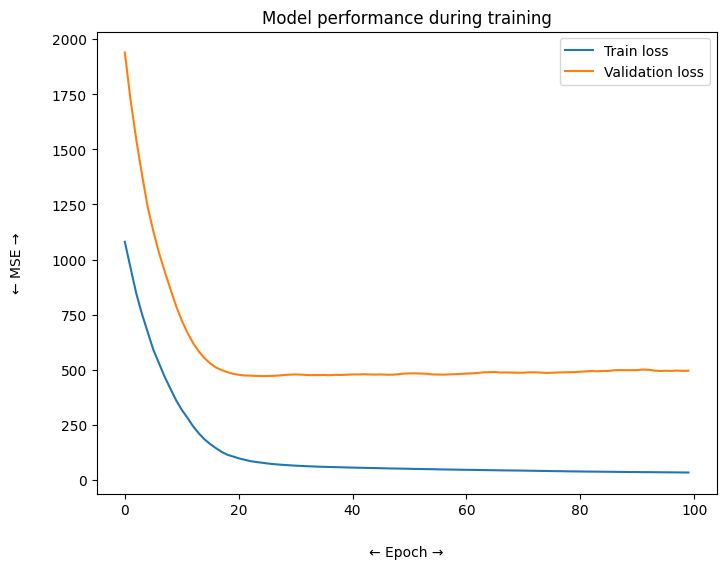

In [ ]:
plt.plot(result.history['loss'], label="Train loss")
plt.plot(result.history['val_loss'], label="Validation loss")
plt.xlabel("← Epoch →", labelpad=20)
plt.ylabel("← MSE →", labelpad=20)
plt.title("Model performance during training")
plt.legend();

Seems to be pretty good.

#### ➡ Predict and plot the results

In [ ]:
pred_tr = model.predict(Xtr).flatten()
pred_te = model.predict(Xte).flatten()

1/1 [==============================] - 0s 26ms/step


In [ ]:
passengers.loc[train_idx[lag+1:], "OneStep Diff Train Prediction"] = pred_tr
passengers.loc[test_idx, "OneStep Diff Test Prediction"] = pred_te

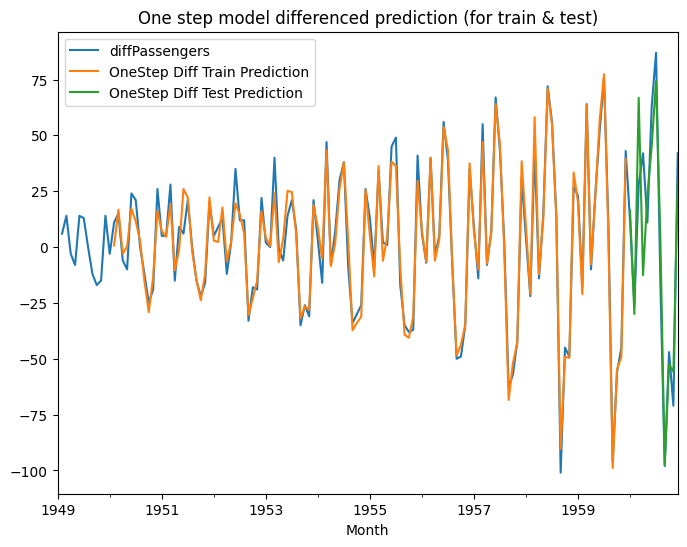

In [ ]:
passengers[["diffPassengers",
            "OneStep Diff Train Prediction",
            "OneStep Diff Test Prediction"]].plot()
plt.title("One step model differenced prediction (for train & test)");

In [ ]:
def evaluate_results(true, pred):
    print("R2: ", r2_score(true, pred))
    print("MAPE:", mean_absolute_percentage_error(true, pred), "%")

In [ ]:
evaluate_results(ytr, pred_tr)

R2:  0.9680583382588505
MAPE: 193043474622688.1 %


Oops, the MAPE is like 🤯 <br>
I think we should **undo** the difference, and then try assessing the result.

#### Reall how to undo...

For one-step: *just add the previous **true** step to the prediction.*

In [ ]:
prev = passengers["Passengers"].shift(1)

In [ ]:
passengers.loc[train_idx[lag+1:], "OneStep Orig Train Pred"] = prev[train_idx[lag+1:]] + pred_tr
passengers.loc[test_idx, "OneStep Orig Test Pred"] = prev[test_idx] + pred_te

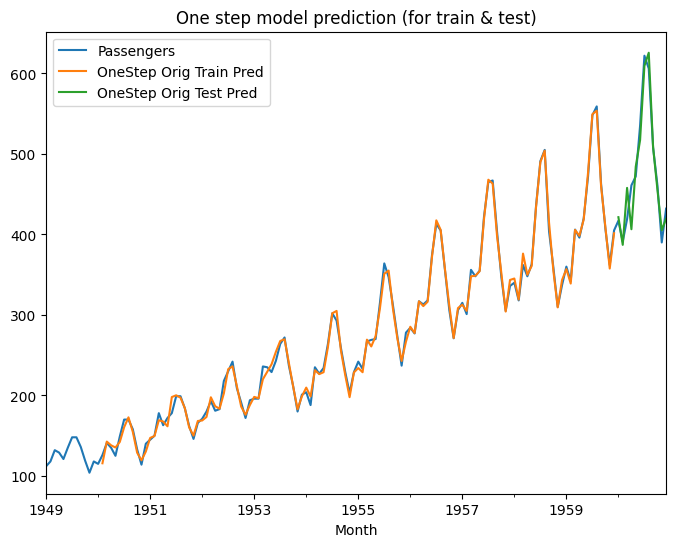

In [ ]:
passengers[["Passengers", "OneStep Orig Train Pred", "OneStep Orig Test Pred"]].plot()
plt.title("One step model prediction (for train & test)");

In [ ]:
evaluate_results(passengers.loc[test_idx, "Passengers"], passengers.loc[test_idx, "OneStep Orig Test Pred"])

R2:  0.9104711769318388
MAPE: 0.03536114345161248 %


The results are pretty good guys!

I know we have achieved this **after all of the work**. Looks a lot of code... but it isn't. These things are looking long because of the **code re-producubility**. If I were to do this kind of stuff, it would take very less time and code.
___
Let's have a look on other type of methods.

#

## `2.` Multi step model

Since the model is **already trained** we don't need to train it once again. We will just **change the way we forecast**.

#### ➡ Predict and plot the results

In [ ]:
last_xte = Xte[0].reshape(1, -1)
multi_step_pred = []
for i in range(yte.shape[0]):
    pred = model.predict(last_xte)[0]
    last_xte = np.roll(last_xte, -1)
    last_xte[-1][-1] = pred

    multi_step_pred.append(pred)

1/1 [==============================] - 0s 22ms/step


<ipython-input-37-a38836be9697>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_xte[-1][-1] = pred


1/1 [==============================] - 0s 24ms/step


In [ ]:
passengers.loc[test_idx, "MultiStep Test Prediction"] = multi_step_pred

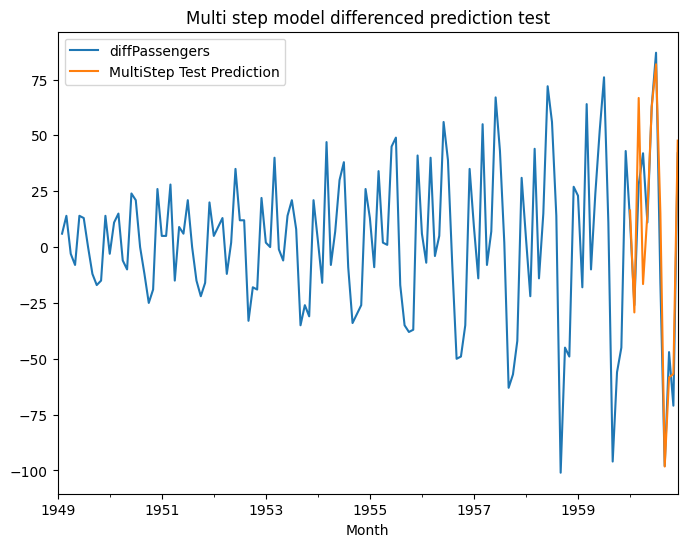

In [ ]:
passengers[["diffPassengers", "MultiStep Test Prediction"]].plot()
plt.title("Multi step model differenced prediction test");

#### Reall how to undo...

For multi-step: *just add the previous **true** step and perform cumsum.*

In [ ]:
last_train = passengers.loc[train_idx[-1], "Passengers"]

In [ ]:
passengers.loc[test_idx, "MultiStep Orig Test Pred"] = last_train + np.cumsum(multi_step_pred)

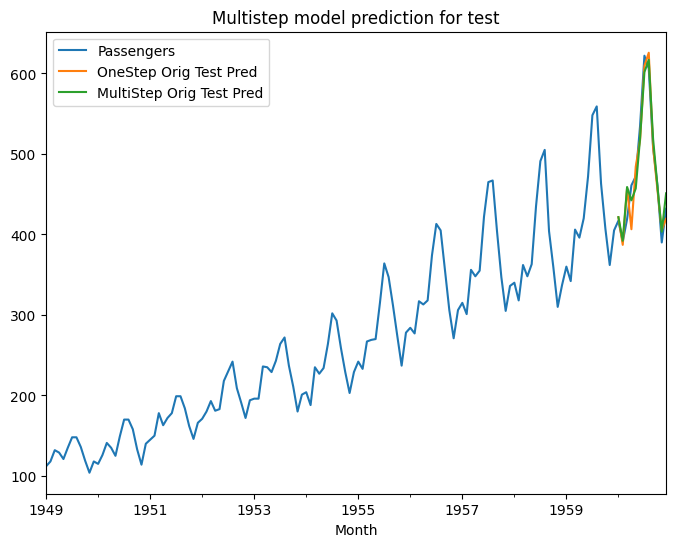

In [ ]:
passengers[["Passengers", "OneStep Orig Test Pred", "MultiStep Orig Test Pred"]].plot()
plt.title("Multistep model prediction for test");

In [ ]:
evaluate_results(passengers.loc[test_idx, "Passengers"], passengers.loc[test_idx, "MultiStep Orig Test Pred"])

R2:  0.9458080631147789
MAPE: 0.03007273423718085 %


This is amazing as well!

#

## `3.` Multi output model

Here, we will need to create different training and testing data... and will need to re-train the model from scratch. Not only that, the model's **structure** will change as well.

In [ ]:
# for this we will have to construct another dataset
# the current supervised dataset won't help.

lag = 12
h = 12
X, y = [], []
for offset in range(len(np_data) - lag - h + 1):
    X.append(np_data[offset : offset+lag])
    y.append(np_data[offset+lag : offset+lag+h])

X = np.array(X)
y = np.array(y)

In [ ]:
Xtr_m, ytr_m = X[:-1], y[:-1]
Xte_m, yte_m = X[[-1]], y[[-1]]

In [ ]:
Xtr_m.shape

(119, 12)

In [ ]:
ytr_m.shape

(119, 12)

####  Model creation

In [ ]:
input_layer = Input(shape=(Xtr_m.shape[1], ))
h1 = Dense(32, activation="relu")(input_layer)
h1 = Dense(32, activation="relu")(h1)
output_layer = Dense(ytr_m.shape[1])(h1)
model = Model(input_layer, output_layer)

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 12)]              0         
                                                                 
 dense_7 (Dense)             (None, 32)                416       
                                                                 
 dense_8 (Dense)             (None, 32)                1056      
                                                                 
 dense_9 (Dense)             (None, 12)                396       
                                                                 
Total params: 1868 (7.30 KB)
Trainable params: 1868 (7.30 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# compile
model.compile(optimizer="adam", loss="mse")

In [ ]:
# fit
mtr_result = model.fit(Xtr_m, ytr_m,
                       epochs=100,
                       validation_data=(Xte_m, yte_m))

Epoch 1/100
4/4 [==============================] - 1s 71ms/step - loss: 1582.7172 - val_loss: 2533.6633
Epoch 2/100
4/4 [==============================] - 0s 13ms/step - loss: 1456.4224 - val_loss: 2367.8943
Epoch 3/100
4/4 [==============================] - 0s 13ms/step - loss: 1344.8892 - val_loss: 2241.1169
Epoch 4/100
4/4 [==============================] - 0s 17ms/step - loss: 1254.2812 - val_loss: 2116.3428
Epoch 5/100
4/4 [==============================] - 0s 19ms/step - loss: 1176.5483 - val_loss: 2008.9868
Epoch 6/100
4/4 [==============================] - 0s 14ms/step - loss: 1101.8931 - val_loss: 1918.3379
Epoch 7/100
4/4 [==============================] - 0s 14ms/step - loss: 1046.8217 - val_loss: 1849.6973
Epoch 8/100
4/4 [==============================] - 0s 13ms/step - loss: 992.6601 - val_loss: 1792.3741
Epoch 9/100
4/4 [==============================] - 0s 13ms/step - loss: 949.3632 - val_loss: 1743.5479
Epoch 10/100
4/4 [==============================] - 0s 13ms/step -

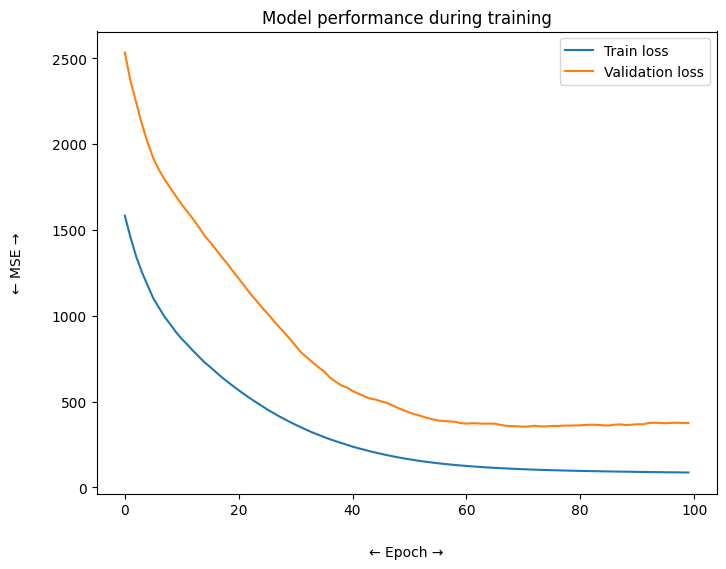

In [ ]:
plt.plot(mtr_result.history['loss'], label="Train loss")
plt.plot(mtr_result.history['val_loss'], label="Validation loss")
plt.xlabel("← Epoch →", labelpad=20)
plt.ylabel("← MSE →", labelpad=20)
plt.title("Model performance during training")
plt.legend();

In [ ]:
mtr_test_pred = model.predict(Xte_m)

1/1 [==============================] - 0s 60ms/step


In [ ]:
passengers.loc[test_idx, "MultiOutput Orig Test Pred"] = last_train + np.cumsum(mtr_test_pred)

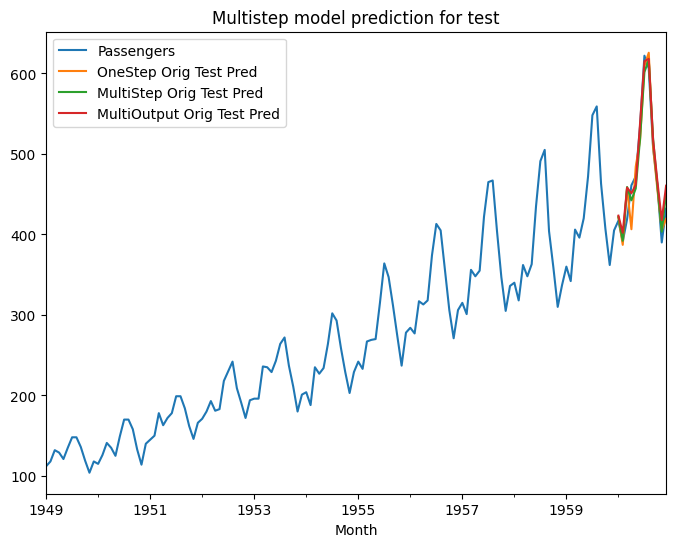

In [ ]:
passengers[["Passengers", "OneStep Orig Test Pred", "MultiStep Orig Test Pred", "MultiOutput Orig Test Pred"]].plot()
plt.title("Multistep model prediction for test");

In [ ]:
evaluate_results(passengers.loc[test_idx, "Passengers"], passengers.loc[test_idx, "MultiOutput Orig Test Pred"])

R2:  0.9428678922778925
MAPE: 0.031936073116740384 %


The best of all. Great. Great.

#

# Without Differencing

In [ ]:
passengers.columns

Index(['Passengers', 'diffPassengers', 'OneStep Diff Train Prediction',
       'OneStep Diff Test Prediction', 'OneStep Orig Train Pred',
       'OneStep Orig Test Pred', 'MultiStep Test Prediction',
       'MultiStep Orig Test Pred', 'MultiOutput Orig Test Pred'],
      dtype='object')

In [ ]:
# reset
passengers = passengers.drop(['diffPassengers', 'OneStep Diff Train Prediction',
       'OneStep Diff Test Prediction', 'OneStep Orig Train Pred',
       'OneStep Orig Test Pred', 'MultiStep Test Prediction',
       'MultiStep Orig Test Pred', 'MultiOutput Orig Test Pred'], axis=1)

# `1.` One step model

In [ ]:
lag = 12
train_idx = passengers.iloc[:-lag].index
test_idx = passengers.iloc[-lag:].index

In [ ]:
np_data = passengers.loc[:, "Passengers"].dropna().values
X = []
Y = []

for i in range(0, np_data.shape[0] - lag):
    x = np_data[i : i + lag]
    y = np_data[i + lag]
    X.append(x)
    Y.append(y)

X = np.array(X)
Y = np.array(Y)

In [ ]:
Xtr, Xte = X[:-lag], X[-lag:]
ytr, yte = Y[:-lag], Y[-lag:]

In [ ]:
# everything in a single cell
input_layer = Input(shape=(Xtr.shape[1],))
h1 = Dense(32, activation="relu")(input_layer)
h2 = Dense(16, activation="relu")(h1)
output_layer = Dense(1, activation=None)(h2)
model = Model(input_layer, output_layer)

In [ ]:
model.compile(optimizer="adam", loss="mse", metrics=["mse", "mape"])

In [ ]:
result = model.fit(Xtr, ytr,
         epochs=1000,
         validation_data=(Xte, yte), verbose=0)

Yeah, keeping verbose `0` 🙂

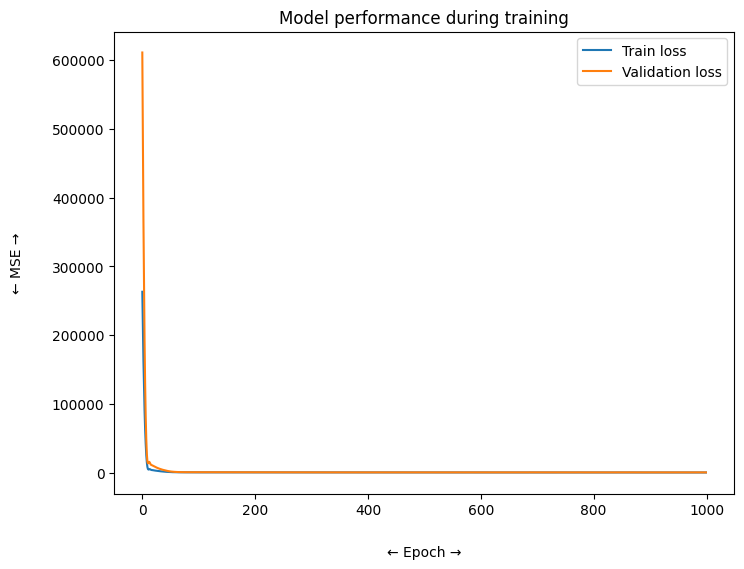

In [ ]:
plt.plot(result.history['loss'], label="Train loss")
plt.plot(result.history['val_loss'], label="Validation loss")
plt.xlabel("← Epoch →", labelpad=20)
plt.ylabel("← MSE →", labelpad=20)
plt.title("Model performance during training")
plt.legend();

Have a look! **without differencing** more than 200 epochs are needed!

In [ ]:
pred_tr = model.predict(Xtr).flatten()
pred_te = model.predict(Xte).flatten()

1/1 [==============================] - 0s 22ms/step


In [ ]:
pred_tr.shape

(120,)

In [ ]:
passengers.loc[train_idx[lag:], "OneStep Train Prediction"] = pred_tr
passengers.loc[test_idx, "OneStep Test Prediction"] = pred_te

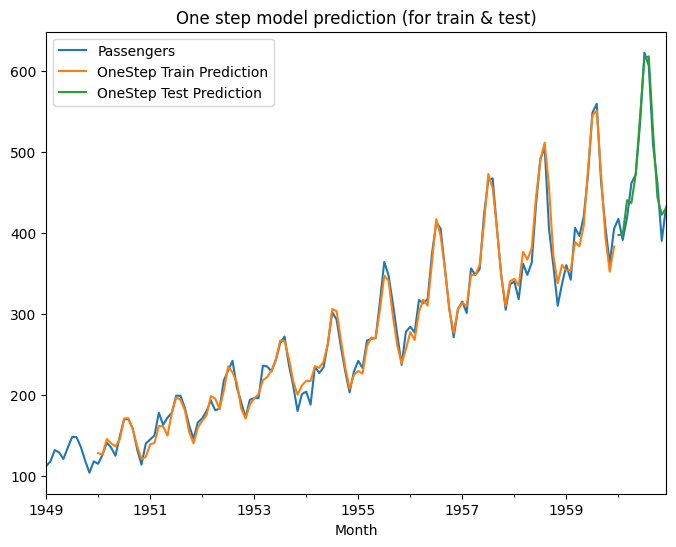

In [ ]:
passengers[["Passengers",
            "OneStep Train Prediction",
            "OneStep Test Prediction"]].plot()
plt.title("One step model prediction (for train & test)");

In [ ]:
evaluate_results(yte, pred_te)

R2:  0.9498977761991291
MAPE: 0.030884826369757257 %


Doing already good here.

#

## `2.` Multi step model

Since the model is **already trained** we don't need to train it once again. We will just **change the way we forecast**.

#### ➡ Predict and plot the results

In [ ]:
last_xte = Xte[0].reshape(1, -1)
multi_step_pred = []
for i in range(yte.shape[0]):
    pred = model.predict(last_xte)[0]
    last_xte = np.roll(last_xte, -1)
    last_xte[-1][-1] = pred

    multi_step_pred.append(pred)

1/1 [==============================] - 0s 24ms/step


<ipython-input-71-a38836be9697>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_xte[-1][-1] = pred


1/1 [==============================] - 0s 21ms/step


In [ ]:
passengers.loc[test_idx, "MultiStep Test Prediction"] = multi_step_pred

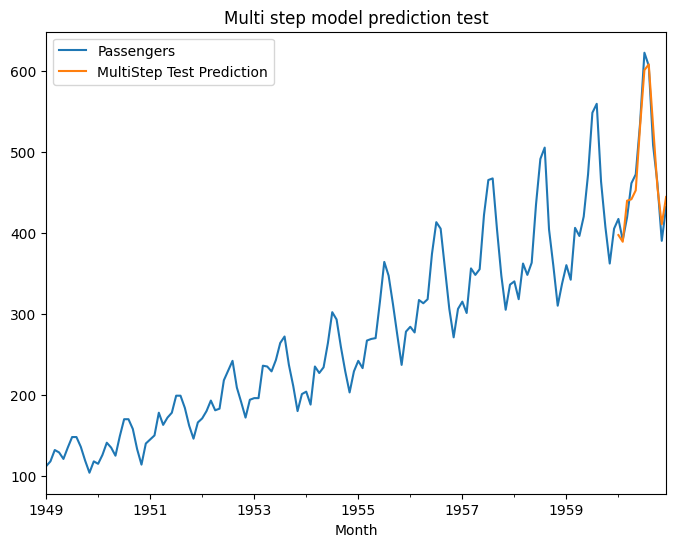

In [ ]:
passengers[["Passengers", "MultiStep Test Prediction"]].plot()
plt.title("Multi step model prediction test");

In [ ]:
evaluate_results(passengers.loc[test_idx, "Passengers"], passengers.loc[test_idx, "MultiStep Test Prediction"])

R2:  0.951707881105418
MAPE: 0.030705299138174044 %


#

## `3.` Multi output model

Here, we will need to create different training and testing data... and will need to re-train the model from scratch. Not only that, the model's **structure** will change as well.

In [ ]:
# for this we will have to construct another dataset
# the current supervised dataset won't help.

lag = 12
h = 12
X, y = [], []
for offset in range(len(np_data) - lag - h + 1):
    X.append(np_data[offset : offset+lag])
    y.append(np_data[offset+lag : offset+lag+h])

X = np.array(X)
y = np.array(y)

In [ ]:
Xtr_m, ytr_m = X[:-1], y[:-1]
Xte_m, yte_m = X[[-1]], y[[-1]]

In [ ]:
Xtr_m.shape

(120, 12)

In [ ]:
ytr_m.shape

(120, 12)

####  Model creation

In [ ]:
input_layer = Input(shape=(Xtr_m.shape[1], ))
h1 = Dense(32, activation="relu")(input_layer)
h1 = Dense(32, activation="relu")(h1)
output_layer = Dense(ytr_m.shape[1])(h1)
model = Model(input_layer, output_layer)

In [ ]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 12)]              0         
                                                                 
 dense_13 (Dense)            (None, 32)                416       
                                                                 
 dense_14 (Dense)            (None, 32)                1056      
                                                                 
 dense_15 (Dense)            (None, 12)                396       
                                                                 
Total params: 1868 (7.30 KB)
Trainable params: 1868 (7.30 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# compile
model.compile(optimizer="adam", loss="mse")

In [ ]:
# fit
mtr_result = model.fit(Xtr_m, ytr_m,
                       epochs=1000,
                       validation_data=(Xte_m, yte_m),
                       verbose=0)

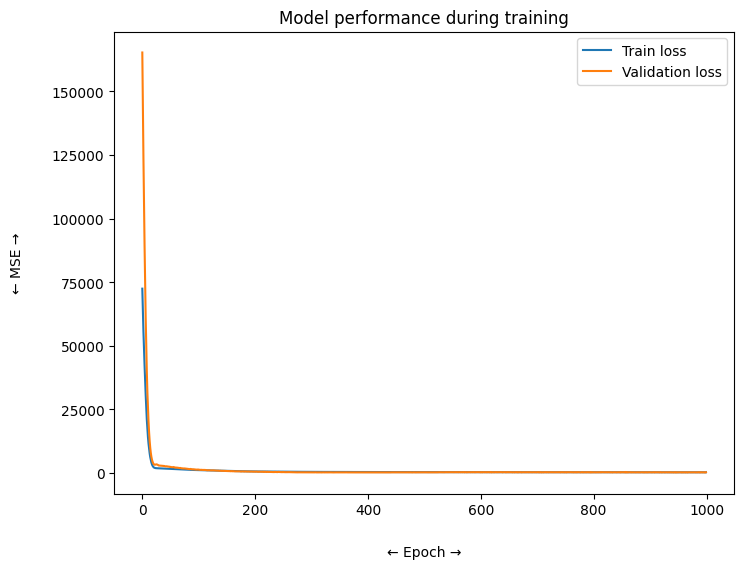

In [ ]:
plt.plot(mtr_result.history['loss'], label="Train loss")
plt.plot(mtr_result.history['val_loss'], label="Validation loss")
plt.xlabel("← Epoch →", labelpad=20)
plt.ylabel("← MSE →", labelpad=20)
plt.title("Model performance during training")
plt.legend();

In [ ]:
mtr_test_pred = model.predict(Xte_m)

1/1 [==============================] - 0s 91ms/step


In [ ]:
mtr_test_pred = mtr_test_pred.flatten()

In [ ]:
passengers.loc[test_idx, "MultiOutput Test Pred"] = mtr_test_pred

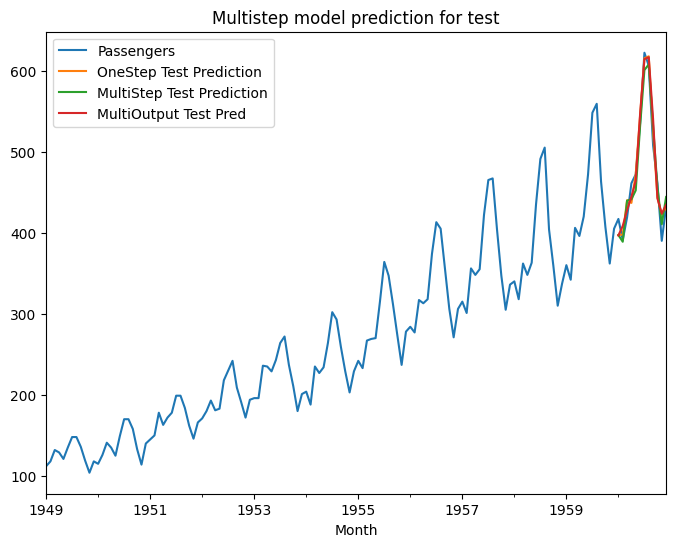

In [ ]:
passengers[["Passengers",
            "OneStep Test Prediction",
            "MultiStep Test Prediction",
            "MultiOutput Test Pred"]].plot()
plt.title("Multistep model prediction for test");

In [ ]:
evaluate_results(passengers.loc[test_idx, "Passengers"], passengers.loc[test_idx, "MultiOutput Test Pred"])

R2:  0.9407073889042789
MAPE: 0.034417121202802915 %


Again, the best of all.

#

# Great, indeed!
We have worked pretty great achieving a good R2. See, we have not considered going with walk-forward validation and grid-search to adjust my hyperparams, but it can be done.

See you in the next book.